In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML
import copy

In [12]:
def define_media(iflaga):
    global nx, ny, mxst, mxnd, myst, mynd, mediaEz, mediaHx, mediaHy




    if (iflaga == 2):
        for  i in range(nx):
            for j in range(ny):
                if (i >= mxst-1) and (i <= mxnd-1):
                    if ( j >= myst-1) and (j <= mynd-1):
                        mediaEz[i,j] = 2
        
        for  i in range(nx):
            for j in range(ny):
                if (i >= mxst-1) and (i <= mxnd-1):
                    if ( j >= myst-1) and (j <= mynd-2):
                        mediaHx[i,j] = 2

        for  i in range(nx):
            for j in range(ny):
                if (i >= mxst-1) and (i <= mxnd-2):
                    if ( j >= myst-1) and (j <= mynd-1):
                        mediaHy[i,j] = 2

In [13]:
def define_coefficients():
    global Ca, Cb, Da, Db # Define material based coefficients
    global xmu, eps0, dt, ds
    # Field Coefficients
    dte = dt/(ds*eps0)
    dtm = dt/(ds*xmu)
    Da[0] = 1
    Db[0] = dtm
    Ca[0] = 1
    Cb[0] = dte
    dte1 = dt/(ds*eps0*4)
    dtm1 = dt/(ds*xmu)
    Da[1] = 1
    Db[1] = dtm1
    Ca[1] = 1
    Cb[1] = dte1


In [14]:
def Source(n, sources):
    global Ezs
    # Creates a half-sinusoidal source between the time increments
    # 1 and 10.%
    # When source = 1 : Sinusoid
    #               2 : Gaussian
    #
    ## For Gaussian Source
    if sources == 2:
            xndec = 10.0
            xn0 = 4*xndec
            Ezs = math.exp(-((n-xn0)/(xndec))**2)
        ## For Sinusoidal Source
    elif sources == 1:
        if ( n >=1-1) and (n <= 10-1):
            Ezs = math.sin(n*math.pi/10)
    return Ezs

In [15]:
def adv_Ez(n, sources):
    global Ez, Hx, Hy
    global mediaEz
    global Ca, Cb
    global nx, ny
    for i in range(nx):
        for j in range(ny):
            m  = int(mediaEz(i,j)-1)
            if (i == 6):  # Incident Field Source Excitation
                Es = Source(n, sources) # Es is a soft source
            else:
                Es = 0
            if (i >= 1 and j >=1):
                Ez[i,j] = Ez[i,j]*Ca[m] + Cb[m]*(Hy[i,j] - Hy[i-1,j]- (Hx[i,j] - Hx[i,j-1])) + Es
            elif (i >= 2 and j == 1): # Field at the bottom edge of the boundary
                Ez[i,j] = Ez[i,j]*Ca[m] + Cb[m]*(Hy[i,j] - Hy[i-1,j]- Hx(i,j)) + Es

In [16]:
def adv_H(n):
    global Ez, Hx, Hy
    global mediaHx, mediaHy
    global Da, Db
    global nx, ny
    for i in range(nx):
        for j in range(ny-1):
            m = int(mediaHx[i, j]-1)
            Hx[i, j] = Hx[i, j]*Da[m] - Db[m]*(Ez[i, j+1] - Ez[i, j])
    for i in range(nx-1):
        for j in range(ny):
            m = int(mediaHy[i, j]-1)
            Hy[i, j] = Hy[i, j]*Da[m] + Db[m]*(Ez[i+1, j] - Ez[i, j])

In [17]:
def my_surface_plot(field):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xd = np.linspace(0, 10, 100)
    yd = np.linspace(0, 10, 80)
    [xdg, ydg] = np.meshgrid(xd, yd)
    dem3d = ax.plot_surface(xdg, ydg, field, cmap='rainbow', edgecolor='none')
    fig.colorbar(dem3d, shrink=0.5, aspect=5)


def my_line_plot(Ez_5, Ez_15, Ez_25, Ez_35, Ez_45, Ez_55, Ez_65, Ez_75, Ez_85, Ez_95, iflaga, source):
    maxval=1.4
    fig = plt.figure(figsize=(6,6))
    plt.subplot(10, 1, 1)
    plt.plot(range(len(Ez_5)), Ez_5, 'k', label='n=5')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 2)
    plt.plot(range(len(Ez_15)), Ez_15, 'k', label='n=15')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 3)
    plt.plot(range(len(Ez_25)), Ez_25, 'k', label='n=25')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 4)
    plt.plot(range(len(Ez_35)), Ez_35, 'k', label='n=35')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 5)
    plt.plot(range(len(Ez_45)), Ez_45, 'k', label='n=45')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 6)
    plt.plot(range(len(Ez_55)), Ez_55, 'k', label='n=55')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 7)
    plt.plot(range(len(Ez_65)), Ez_65, 'k', label='n=65')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 8)
    plt.plot(range(len(Ez_75)), Ez_75, 'k', label='n=75')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 9)
    plt.plot(range(len(Ez_85)), Ez_85, 'k', label='n=85')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 10)
    plt.plot(range(len(Ez_95)), Ez_95, 'k', label='n=95')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    #plt.xticks([])
    if iflaga == 1 and source == 1:
        fig.suptitle('Line Plots for E-field with no obstacle for a sinusoid source')
    elif iflaga == 2 and source == 1:
        fig.suptitle('Line Plots for E-field with a dielectric box for a sinusoid source, strip = %d' % strip)
    elif source == 2:
        fig.suptitle('Line Plots for E-field with no obstacle for a Gaussian source')
    plt.show()


In [18]:
## Routine to zero out the global variables
#*************************
# *************************
def zeroing():
# Clears but retains the variables in memory

    global nx,  ny
    global Ez,  Hx,  Hy # Create E and H field components.
    # global data type enables the global scope of the variables
    # within the code. Unlike global variables they can not be accessed
    #outside the code
    global mediaEz, mediaHx, mediaHy
    global Ca, Cb, Da, Db # Define material based coefficients


    Ez = np.zeros((nx,ny)) # z-component of E-field
    Hx = np.zeros((nx,ny)) # x-component of H-field
    Hy = np.zeros((nx,ny)) # y-component of H-field

    mediaEz = np.ones((nx,ny)) # z-component of E-field
    mediaHx = np.ones((nx,ny)) #x-component of H-field
    mediaHy = np.ones((nx,ny)) # x-component of H-field

    Ca = np.zeros((2,1)) # x-component of H-field
    Cb = np.zeros((2,1)) # x-component of H-field
    Da = np.zeros((2,1)) # x-component of H-field
    Db = np.zeros((2,1)) # x-component of H-field


In [19]:
def init_ex4():
    ############## Parameters
    global c, xmu, eps0, asize
    global nx, ny, nt, mxst, mxnd, myst, mynd
    global dt, ds
    global Ez, Hx, Hy #Create E and H field components.
    # global data type enables the global scope of the variables
    # within the code.Unlike global variables they can not be accessed
    # outside the code
    global mediaEz, mediaHx, mediaHy
    global Ca, Cb, Da, Db # Define material based coefficients
    global Ezs # The excitation signal
    global strip

    c = 2.99792458e8
    xmu = 4 * math.pi * 10**(-7)
    eps0 = 8.854187817*10**(-12)
    asize = 5
    nx = 80
    ny = 100
    nt = 100
    mxst = 17
    mxnd = 49
    myst = 33
    mynd = 65
    strip = 30

    Ez = np.zeros((nx, ny),dtype='longdouble')
    Hx = np.zeros((nx, ny),dtype='longdouble')
    Hy = np.zeros((nx, ny),dtype='longdouble')

    mediaEz = np.ones((nx, ny),dtype='longdouble')
    mediaHx = np.ones((nx, ny),dtype='longdouble')
    mediaHy = np.ones((nx, ny),dtype='longdouble')

    Ca = np.zeros((2, 1),dtype='longdouble')
    Cb = np.zeros((2, 1),dtype='longdouble')
    Da = np.zeros((2, 1),dtype='longdouble')
    Db = np.zeros((2, 1),dtype='longdouble')


    ds = asize / (mxnd - mxst - 1)
    dt = ds / (c * math.sqrt(2))

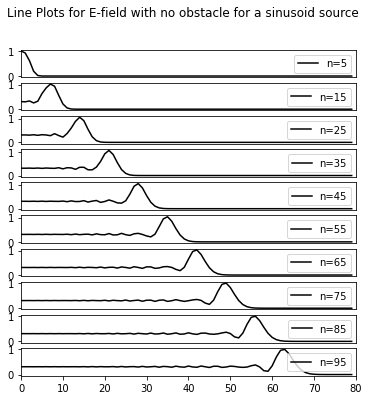

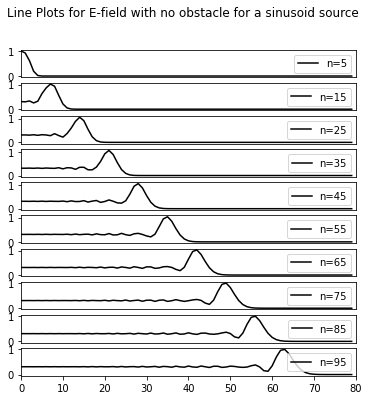

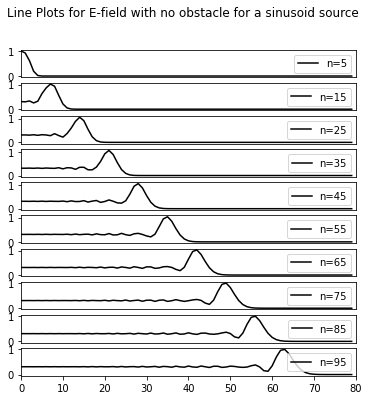

In [20]:
init_ex4()
iflaga = 1  # PEC box
source = 1  # sinusoid source
strip = 30
define_media(iflaga)
define_coefficients()

for x in range(nt):
    n = x + 1
    adv_Ez(n, source)
    adv_H(n)
    if n == 5:
        Ez_5 = copy.deepcopy(Ez[:, strip])
    elif n == 15:
        Ez_15 = copy.deepcopy(Ez[:, strip])
    elif n == 25:
        Ez_25 = copy.deepcopy(Ez[:, strip])
    elif n == 35:
        Ez_35 = copy.deepcopy(Ez[:, strip])
    elif n == 45:
        Ez_45 = copy.deepcopy(Ez[:, strip])
    elif n == 55:
        Ez_55 = copy.deepcopy(Ez[:, strip])
    elif n == 65:
        Ez_65 = copy.deepcopy(Ez[:, strip])
    elif n == 75:
        Ez_75 = copy.deepcopy(Ez[:, strip])
    elif n == 85:
        Ez_85 = copy.deepcopy(Ez[:, strip])
    elif n == 95:
        Ez_95 = copy.deepcopy(Ez[:, strip])

my_line_plot(Ez_5, Ez_15, Ez_25, Ez_35, Ez_45, Ez_55, Ez_65, Ez_75, Ez_85, Ez_95, iflaga, source)
zeroing()

iflaga = 1  # PEC box
source = 1  # sinusoid source
strip = 50
define_media(iflaga)
define_coefficients()

for x in range(nt):
    n = x + 1
    adv_Ez(n, source)
    adv_H(n)
    if n == 5:
        Ez_5 = copy.deepcopy(Ez[:, strip])
    elif n == 15:
        Ez_15 = copy.deepcopy(Ez[:, strip])
    elif n == 25:
        Ez_25 = copy.deepcopy(Ez[:, strip])
    elif n == 35:
        Ez_35 = copy.deepcopy(Ez[:, strip])
    elif n == 45:
        Ez_45 = copy.deepcopy(Ez[:, strip])
    elif n == 55:
        Ez_55 = copy.deepcopy(Ez[:, strip])
    elif n == 65:
        Ez_65 = copy.deepcopy(Ez[:, strip])
    elif n == 75:
        Ez_75 = copy.deepcopy(Ez[:, strip])
    elif n == 85:
        Ez_85 = copy.deepcopy(Ez[:, strip])
    elif n == 95:
        Ez_95 = copy.deepcopy(Ez[:, strip])

my_line_plot(Ez_5, Ez_15, Ez_25, Ez_35, Ez_45, Ez_55, Ez_65, Ez_75, Ez_85, Ez_95, iflaga, source)
zeroing()

iflaga = 1  # PEC box
source = 1  # sinusoid source
strip = 65
define_media(iflaga)
define_coefficients()

for n in range(nt):
    
    adv_Ez(n, source)
    adv_H(n)
    if n == 5:
        Ez_5 = copy.deepcopy(Ez[:, strip])
    elif n == 15:
        Ez_15 = copy.deepcopy(Ez[:, strip])
    elif n == 25:
        Ez_25 = copy.deepcopy(Ez[:, strip])
    elif n == 35:
        Ez_35 = copy.deepcopy(Ez[:, strip])
    elif n == 45:
        Ez_45 = copy.deepcopy(Ez[:, strip])
    elif n == 55:
        Ez_55 = copy.deepcopy(Ez[:, strip])
    elif n == 65:
        Ez_65 = copy.deepcopy(Ez[:, strip])
    elif n == 75:
        Ez_75 = copy.deepcopy(Ez[:, strip])
    elif n == 85:
        Ez_85 = copy.deepcopy(Ez[:, strip])
    elif n == 95:
        Ez_95 = copy.deepcopy(Ez[:, strip])

my_line_plot(Ez_5, Ez_15, Ez_25, Ez_35, Ez_45, Ez_55, Ez_65, Ez_75, Ez_85, Ez_95, iflaga, source)
zeroing()